# (Draft) Data Science - Professional Cerificate Program - Havard University

## Data Science: Visualization

### Brief preface

**A picture is worth a thousand words**

Data visualization provides a powerful way to communicate a data driven finding. In some cases, the visualization is so convincing that no follow up analysis is required.

An example: [Battling Infectious Diseases in the 20th Century: The Impact of Vaccines](http://graphics.wsj.com/infectious-diseases-and-vaccines/)

> **The greatest value of a picture
is when it forces us to notice what we never expected to see - John Tukey**

Exploratory data analysis is perhaps the most important part of data analysis,
yet it is often overlooked. Data visualization is also now pervasive and philanthropic
in educational organizations.

One example comes from GAPminder and the talks, "New Insights on Poverty"
and "The Best Stats You&#39;ve Ever Seen", Hans Roslings forced us to notice the unexpected with a series of plots
related to world health and economics. In his videos, he used animated graphs to show us how the world was changing,
and how old narratives are no longer true.

[New Insights on Poverty](https://www.ted.com/talks/hans_rosling_reveals_new_insights_on_poverty)

[The Best Stats You&#39;ve Ever Seen](https://www.ted.com/talks/hans_rosling_shows_the_best_stats_you_ve_ever_seen)

[Let my dataset change your mindset](https://www.gapminder.org/videos/ted-us-state-department/)

It is also important to note that mistakes, biases, systematic errors,
and other unexpected problems often lead to data
that should be handled with care. Failure to discover these problems often leads to flawed analyzes
and false discoveries.

The fact that it can be hard or impossible to notice an error just
from the reporter results makes data visualization particularly important.

### Section 1 - Overview

- understand the importance of data visualization for communicating data-driven findings.

- be able to use distributions to summarize data.

- be able to use the average and the standard deviation to understand the normal distribution.

- be able to assess how well a normal distribution fits the data using a quantile-quantile plot.

- be able to interpret data from a boxplot.

#### Section 1.1 Introduction to Data Visualization

### Distributions

A distribution is a basic summary of data values. An average score number and occasionally the standard deviation can form a distribution.

So, for example, you might read a report stating that scores at this high school
were 680 plus or minus 50.

**680 ± 50** (The first is the average score, the last the standard deviation)

It turns out that in some cases, these two numbers
are pretty much all we need to understand the data. Data visualization techniques will help us determine when this two-number summary is appropriate. These same techniques will serve as alternatives for when these two numbers are not enough.

The most basic statistical summary of a list of objects or numbers
is its **distribution**.

Once a vector has been summarized as a distribution,
there are several data visualization techniques to effectively relay
this information.

In [ ]:
install.packages("dslabs")

In [ ]:
library(dslabs)

### Data Types

Categorial
(Variables defined by a small number of groups: Sex(male, female), Regions(North, South)
- Ordinals (Can be ordered in a semantic way: Spiciness(mild, medium, hot))
- Non-Ordinals

Numericals
- Discrete (Have to be round numbers)
- Continuous (Can have any value)

#### Data Type Semantics

The heights$height vector could be considered a **categorial** with categories like small, average, tall,

but,

it is more effective to consider the heights$height vector to be **numerical** given the number of unique values we observe and the fact that if we keep collecting data even more will be observed.

In [6]:
data(heights)
str(heights)

'data.frame':	1050 obs. of  2 variables:
 $ sex   : Factor w/ 2 levels "Female","Male": 2 2 2 2 2 1 1 1 1 2 ...
 $ height: num  75 70 68 74 61 65 66 62 66 67 ...


In [7]:
tab <- table(heights$height)
sum(tab == 1) # unique values we observe

[1] 63

#### Section 1.2 - Introduction to Distributions

**Describe Heights to ET**

A first artificial problem:

Pretend that we have to describe the heights of our classmates
to ET, an extraterrestrial that has never seen humans.

As a first step, we need to collect data.
To do this, we asked students to report their heights in inches.
We asked them to provide sex information because we
know there are two different groups of heights, males and females.

One way to convey the heights to ET is to simply
send him the list of 924 heights. But there are much more effective ways to convey this information, and understanding the concepts of distributions will help.

Again: The most basic statistical summary of a list of objects or numbers
is its distribution.




**The simplest way to think of a distribution
is as a compact description of a list with many elements.** For example: With categorical data, the distribution simply describes the proportions of each unique category. The sex represented in the heights data set can be summarized by the proportions of each of the two categories, female and male. This two category frequency table is the simplest form
of a distribution we can form.


In [38]:
one_percent = length(heights$sex)
male_percentage = length(which(heights$sex == 'Male')) / length(heights$sex) * 100
female_percantage = length(which(heights$sex == 'Female')) / length(heights$sex) * 100
print('Distribution: Male/Female %')
round(male_percentage)
round(female_percantage)

[1] "Distribution: Male/Female %"


[1] 77

[1] 23

When the data is numerical, the task is much more challenging.

Why ? In general, when data is not categorical, reporting the frequency of each unique entry is not an effective summary since most entries are unique.

For example, while several students reported a height of 68 inches,
only one student reported a height of 68.503937007874 inches.
And only one student reported a height of 68.8976377952756 inches.
We assume that they converted from 174 centimeters and 175 centimeters
to inches respectively.

Statistics textbooks teach us that a more useful way
to define a distribution for numerical data
is to define a function that reports the proportion of the data
below a value A for all possible values of A. **This function is called a cumulative distribution function or CDF.**

In fact, we can report the proportion of values between any two heights,
say a and b, by computing f of b, and then subtracting f of a.
This means that if we send this plot to ET,
he will have all the information needed to construct the entire list.

<small>Final note: Because CDFs can be determined mathematically,
as opposed to using data as we do here, the word empirical
is added to distinguish, and we use the term empirical CDF or ECDF.</small>

(ADD EXAMPLE CDF PLOT)

Although the CDF provides all the information we need and it is widely discussed in statistics textbooks, the plot is actually not very popular in practice.

The main reason is that it does not easily convey characteristics of interest, such as,
at what value is the distribution centered, is the distribution symmetric, what range contains 95% of the data.

We can decipher all this from the plot, but it's not that easy.

Histograms are much preferred because they greatly
facilitate answering such questions. Histograms sacrifice just a bit of information to produce plots that are much easier to interpret.

The simplest way to make a histogram is to divide a span of our data into non-overlapping bins of the same size. Then for each bin, we count the number of values that fall in that interval. The histogram plots these counts as bars with the base of the bar the interval.

In [8]:
head(heights)

sex,height
Male,75
Male,70
Male,68
Male,74
Male,61
Female,65


**Smooth Density Plots**

Smooth density plots are similar to histograms,
but are aesthetically more appealing.

Heuristic explanation

The main new concept to understand
is that we assume that our list of observed values of observed heights
comes from a much, much larger list of unobserved values.

So in the case of male heights, you can imagine
our lists of students heights comes from a hypothetical list containing
all the heights of all the male students in all the world measured
very precisely.

Because we're assuming that we have (supposed) a million values measured very precisely,
we can make a histogram with very, very small bins.
This is going to help us understand what smooth densities are.
The assumption is that if we do this, consecutive bins will be similar.
This is what we mean by smooth. To make the curve not depend on the hypothetical size
of the hypothetical list, we compute the curve on the frequency scale
rather than the count scale.

Now back to reality.

With our example, we don't have millions of measurements.
Instead, we have 708 and we can't make a histogram with very, very small bins.
So how can we estimate this hypothetical smooth curve
that we would see if we would see all the measurements?

So what we're going to do is we're going to start
by making a histogram with our data, compute frequencies rather than counts,
and using the bin size appropriate for our data,
so the histogram looks like this.

(ADD EXAMPLE)

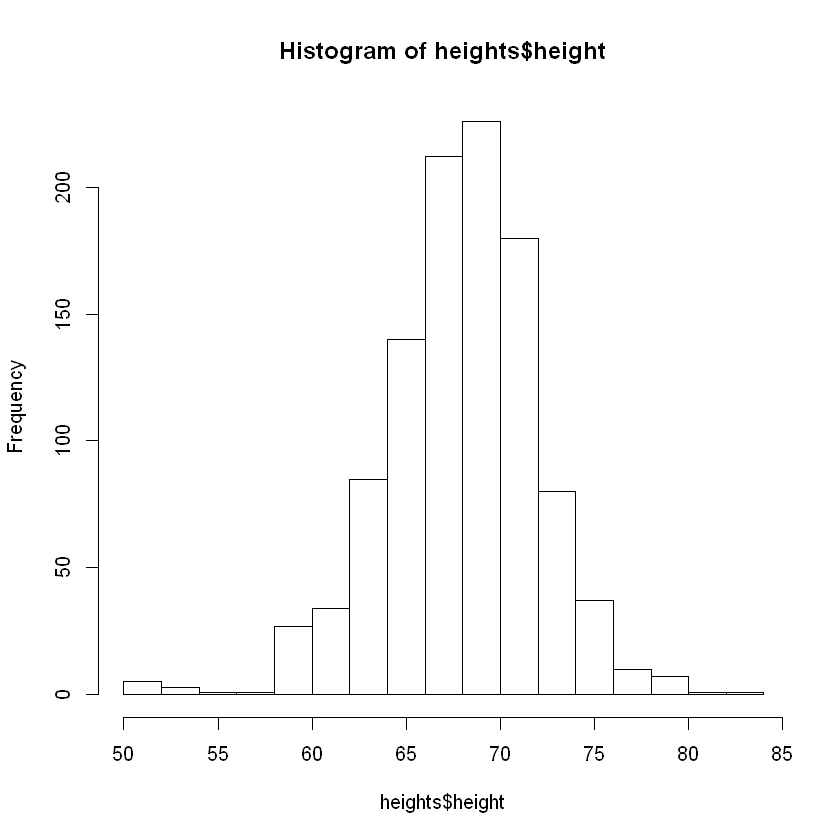

In [11]:
hist(heights$height) # unfinished example

To smooth the histogram what we're going to do
is we're going to start by keeping the heights of the histogram bar.
And now we draw a smooth curve that goes through the top
of these histograms bars.

We can actually control the smoothness of the curve that
defines a smooth density through an option in the function, the GG plot
option that computes the smooth density.

**Understanding the units of the y-axis**

We point out that interpreting the y-axis of a smooth density plot is not straightforward.

It is scaled so that the area under the density curve adds up to 1.
So if you imagine, you form a bin with a base that is 1 unit long.
The y-axis value tells us the proportion of values in that bin.

But this is only true if the bin is of size 1.

For other size intervals, the best way to determine the proportion of data
in that interval is by computing the proportion of the total area contained
in that interval.

(ADD SMOOTH DENSITY PLOT EXAMPLE)

We should select a degree of smoothness that we
can defend as being representative of the underlying data.
In the case of height, we really do have reason
to believe that there are a proportion of people
with similar heights should be about the same.

Always keep in mind that while the histogram is an assumption
free summary, the smooth density is based on assumptions and choices
that you make as a data analyst.

### Normal Distribution
(Also known as 'the bell curve' and 'Gaussian distribution')

It is one of the most famous mathematical concepts in history. A reason for this is that approximately normal distributions occur in many situations.

Examples include, gambling winnings, heights, weights, blood pressure, standardized test scores, and experimental measurement error.

(ADD FURTHER EXPLANATION)

In [43]:
index <- heights$sex == "Male"
x <- heights$height[index]

#average <- sum(x) / length(x)
average <- mean(x)
#standard_deviation <- sqrt(sum(x-average)^2 / length(x))
standard_deviation <- sd(x)

c(Average = average, SD=standard_deviation)

Average        SD 
69.314755  3.611024

You can think of this as the average distance
between the values and their average.

### Standard Units

For data that is approximately normal, it
is convenient to think in terms of standard units.
The standard unit of value tells us how many standard deviations away
from the average this value is.

z = (x-average)/standard_deviation

To understand why standard units are useful,
notice that if we convert normally distributed data into standard units, we can quickly know if for example, a person is about average height, that would mean z equals 0.

A person that is tall would be z equals 2.

A person that is short would be z equals negative 2.

And extremely rare occurrences, say a 7 footer or something like that, would have a z bigger than 3.

Note that it does not matter what the original units are.
These rules apply to any data that is approximately normal.

In R, we can quickly obtain standard units using the function _scale_.

In [45]:
head(scale(x))

1.5744137
0.1897648
-0.3640948
1.2974839
-2.3026033
-0.6410246


To see how many men are within two standard deviations from the average, now that we were already converted to standard units, **all we have to do is count the number of z's that are less than 2 and bigger than negative 2, and then divide by the total**.

In [47]:
z = (x-average)/standard_deviation
mean(abs(z) < 2)

[1] 0.9495074

If we can assume that the data is approximately normal,
at least for this interval, we can predict the proportion
without actually looking at the data.
We simply know that 95% of the data for normally
distributed data is between negative 2 and 2.

Now to further confirm that in fact the approximation is a good one, we need to look at other intervals.
And for this, we will use quantile plots.